In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df_all = pd.read_csv("../data/processed/features_v1.csv")
df_all.drop(['Unnamed: 0'], axis=1, inplace=True)
df_all.head()

,사업연도,회사명,부채비율,유동비율,자기자본비율,고정자산비율,고정비율,순운전자본비율,ln자산총계,총자산이익잉여금비율,ln매출액,매출액순이익률
0,2015,3S,0.763604,0.694608,0.567021,0.775610,1.367869,-0.098656,24.919477,-0.285427,23.772739,-0.262422
1,2015,AJ네트웍스,1.336227,0.412123,0.428041,0.850102,1.986031,-0.213824,27.141447,NaN,26.004031,0.097113
2,2015,AK홀딩스,0.115549,0.074425,0.896420,0.992424,1.107097,-0.094216,26.981501,0.350460,23.736496,1.072212
3,2015,APS,1.445113,1.040981,0.408979,0.467747,1.143695,0.020954,26.289558,0.189401,26.346126,0.033888
4,2015,AP위성,0.120534,8.092935,0.892432,0.199405,0.223440,0.701670,24.463482,0.402504,24.319690,0.241527


In [13]:
company_list = df_all['회사명'].unique()

In [3]:
# '회사명' 컬럼을 기준으로 각 기업별로 결측치를 해당 기업의 값으로만 대체
df_all = df_all.groupby('회사명').apply(lambda group: group.fillna(method='ffill').fillna(method='bfill')).reset_index(drop=True)

In [4]:
# 결측치가 있는 컬럼을 평균값으로 대체
for col in df_all.columns:
    if df_all[col].isna().sum() > 0:
        mean_value = df_all[col].mean()
        df_all[col].fillna(mean_value, inplace=True)

In [5]:
# '매출액순이익률' 컬럼의 결측치를 전체 평균값으로 대체
mean_value = df_all['매출액순이익률'].mean()
df_all['매출액순이익률'].fillna(mean_value, inplace=True)

In [6]:
df_all.isna().sum()

사업연도            0
회사명             0
부채비율            0
유동비율            0
자기자본비율          0
고정자산비율          0
고정비율            0
순운전자본비율         0
ln자산총계          0
총자산이익잉여금비율      0
ln매출액           0
매출액순이익률       128
dtype: int64

In [ ]:
# pairplot 확인
sns.pairplot(df_all.drop(columns=['매출액순이익률']), kind='reg')

KeyboardInterrupt: 

In [9]:
# 상관계수 확인
import scipy.stats

# 숫자형 컬럼만 선택하여 상관계수 계산
numeric_df = df_all.drop(columns=['사업연도']).select_dtypes(include=[np.number])
numeric_df.corr()

,부채비율,유동비율,자기자본비율,고정자산비율,고정비율,순운전자본비율,ln자산총계,총자산이익잉여금비율,ln매출액,매출액순이익률
부채비율,1.000000,-0.001930,-0.038525,-0.000199,0.967796,-0.030482,0.005844,-0.005007,0.005045,-0.000565
유동비율,-0.001930,1.000000,0.012428,-0.040257,-0.003787,0.032391,-0.046823,-0.000095,-0.019141,-0.002197
자기자본비율,-0.038525,0.012428,1.000000,-0.037934,-0.043241,0.919186,0.016806,0.826414,-0.120509,0.016204
고정자산비율,-0.000199,-0.040257,-0.037934,1.000000,0.074180,-0.367930,0.301920,0.012805,0.058088,0.031190
고정비율,0.967796,-0.003787,-0.043241,0.074180,1.000000,-0.057070,0.032324,-0.001681,0.016858,0.001117
순운전자본비율,-0.030482,0.032391,0.919186,-0.367930,-0.057070,1.000000,-0.064498,0.766828,-0.092375,-0.014928
ln자산총계,0.005844,-0.046823,0.016806,0.301920,0.032324,-0.064498,1.000000,0.146871,0.825120,0.027585
총자산이익잉여금비율,-0.005007,-0.000095,0.826414,0.012805,-0.001681,0.766828,0.146871,1.000000,0.241527,0.037084
ln매출액,0.005045,-0.019141,-0.120509,0.058088,0.016858,-0.092375,0.825120,0.241527,1.000000,0.114016
매출액순이익률,-0.000565,-0.002197,0.016204,0.031190,0.001117,-0.014928,0.027585,0.037084,0.114016,1.000000


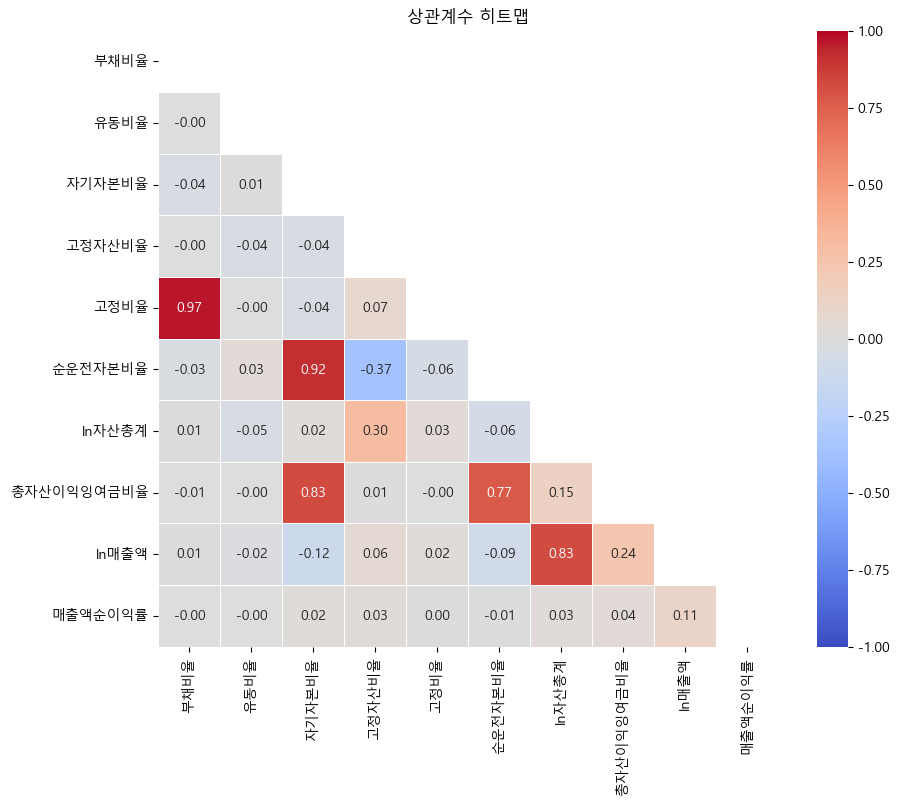

In [10]:
# hitmap 시각화
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmin=-1, vmax=1)
plt.title('상관계수 히트맵')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression #기본 회귀분석 가져오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet #3가지 벌점 회귀

ModuleNotFoundError: No module named 'sklearn'

In [18]:
target = df_all['월수익률_대한항공']
feature = df_all[['월수익률_유가', '월수익률_코스피', '월수익률_환율', '월수익률_금리']]

In [19]:
# 다중회귀분석(OLS)
lr = LinearRegression() #다중회귀분석 모델을 하나 생성
lr.fit(feature, target) #X(506x13 사이즈)와 y(506x1 사이즈)로 회귀분석 실시
print('regression coef:\n ', lr.coef_) #13개 독립변수의 각 회귀계수 출력
print('\nregression intercept:\n', lr.intercept_) #절편값 출력


regression coef:
  [ 0.05219061  1.07285307 -0.22832627  0.19613703]

regression intercept:
 0.0010291766274552025


In [20]:
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5) #Elastic Net 모델을 하나 생성(옵션은 디폴트 값으로)
elastic_net.fit(feature, target) #X와 y로 분석 실시
print('Elastic_Net coef:\n ', elastic_net.coef_)
print('\nElastic_Net intercept:\n', elastic_net.intercept_) #절편값 출력

Elastic_Net coef:
  [ 0.03745176  0.82690999 -0.          0.10387826]

Elastic_Net intercept:
 0.0017011006875268012


In [21]:
Lasso_net = Lasso(alpha=0.001) #Elastic Net 모델을 하나 생성(옵션은 디폴트 값으로)
Lasso_net.fit(feature, target) #X와 y로 분석 실시
print('Elastic_Net coef:\n ', Lasso_net.coef_)
print('\nElastic_Net intercept:\n', Lasso_net.intercept_) #절편값 출력

Elastic_Net coef:
  [ 0.          0.80548033 -0.          0.05035133]

Elastic_Net intercept:
 0.0025085203994612473


In [22]:
Ridge_net = Ridge(alpha=100) #Elastic Net 모델을 하나 생성(옵션은 디폴트 값으로)
Ridge_net.fit(feature, target) #X와 y로 분석 실시
print('Elastic_Net coef:\n ', Ridge_net.coef_)
print('\nElastic_Net intercept:\n', Ridge_net.intercept_) #절편값 출력

Elastic_Net coef:
  [ 0.00129901  0.00234351 -0.00053061  0.00065068]

Elastic_Net intercept:
 0.0044277179281899766
